In [1]:
import grafiti as gf
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import collections
import scanpy as sc
import pandas

import warnings
warnings.filterwarnings('ignore')
model_path = "melanoma_50_50_0.05_50"
annotated_output = "final_melanoma_50_50_0.05_50.h5ad"
fov_key = "sample_fov"
retrain = False

/Users/ceglian/miniforge3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read(annotated_output)

In [3]:
# gf.tl.umap(adata,n_neighbors=100,max_iter=10,metric="cosine")

In [4]:
adata.obs

,x0,y0,celltype,sample_fov,sample_id,Patient_response_abbrev,Lesion_response,Driver_mutation,X,Y,grafiti_motif,gm_bc
uuid,,,,,,,,,,,,
0000106d674375e3,608.561,-498.393,Other_leuk,6_4_1,6_4,CR,UT,nan,608.561,-498.393,GrafitiMotifGrafitiMotif4,GrafitiMotifGrafitiMotif12
00002a78ac47153b,600.943,-883.102,Tumor,2_1_15,2_1,NR,UT,NRAS,600.943,-883.102,GrafitiMotifGrafitiMotif9,GrafitiMotifGrafitiMotif10
00003f4e0bdf1fca,1312.933,-845.891,Tconv4,6_4_9,6_4,CR,UT,nan,1312.933,-845.891,GrafitiMotifGrafitiMotif4,GrafitiMotifGrafitiMotif14
0000525dd9efc770,1138.891,-584.535,Tumor,6_4_8,6_4,CR,UT,nan,1138.891,-584.535,GrafitiMotifGrafitiMotif10,GrafitiMotifGrafitiMotif12
0000527e92eaf601,784.947,-346.326,Other_macro,1_1_5,1_1,NR,UT,nan,784.947,-346.326,GrafitiMotifGrafitiMotif11,GrafitiMotifGrafitiMotif2
...,...,...,...,...,...,...,...,...,...,...,...,...
ffff872872453ef7,541.171,-317.612,Tumor,2_1_2,2_1,NR,UT,NRAS,541.171,-317.612,GrafitiMotifGrafitiMotif9,GrafitiMotifGrafitiMotif10
ffff9ba46ef4b59a,701.149,-793.444,Tumor,3_1_20,3_1,NR,UT,BRAF,701.149,-793.444,GrafitiMotifGrafitiMotif6,GrafitiMotifGrafitiMotif0
ffffc958d0feb5d7,818.349,-889.255,Tumor,3_1_34,3_1,NR,UT,BRAF,818.349,-889.255,GrafitiMotifGrafitiMotif6,GrafitiMotifGrafitiMotif13


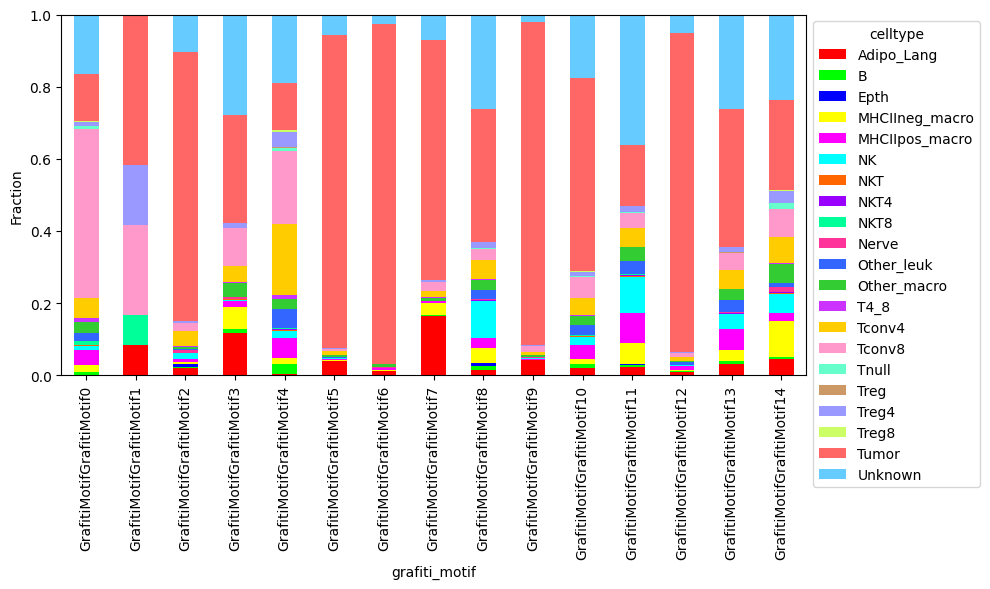

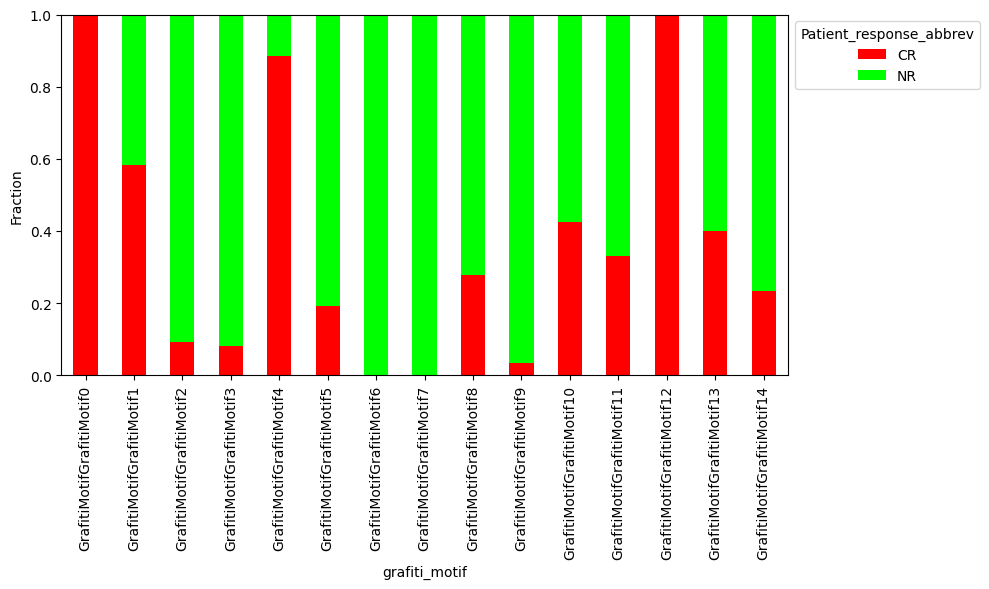

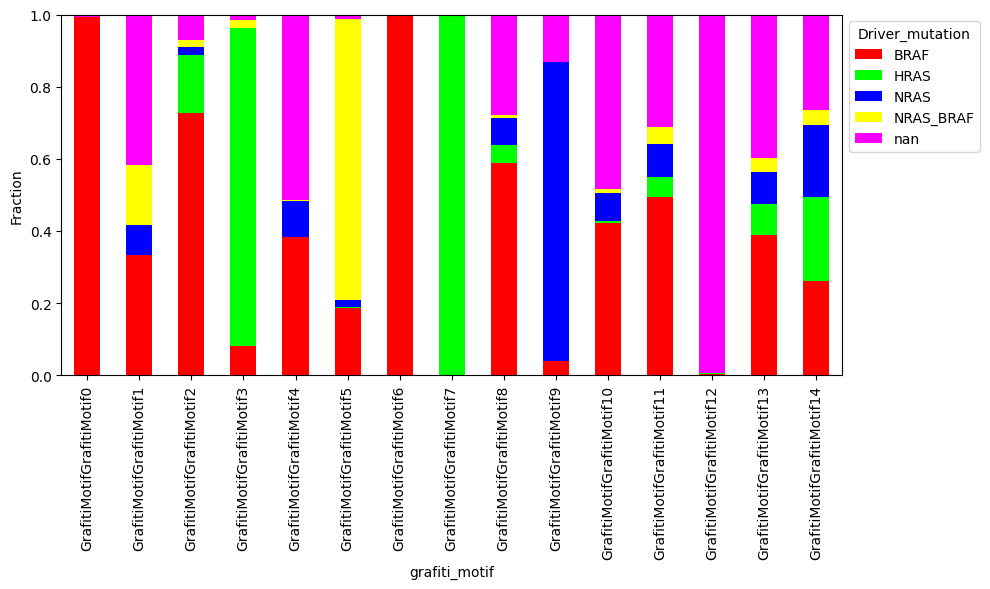

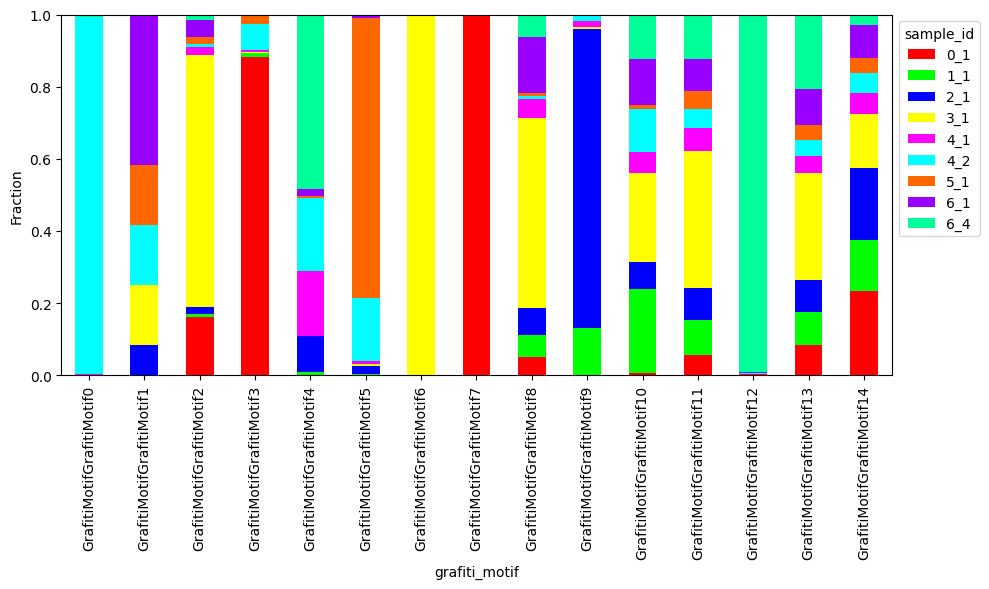

In [5]:
gf.pl.plot_fraction(adata,category="grafiti_motif",variable="celltype")
gf.pl.plot_fraction(adata,category="grafiti_motif",variable="Patient_response_abbrev")
gf.pl.plot_fraction(adata,category="grafiti_motif",variable="Driver_mutation")
gf.pl.plot_fraction(adata,category="grafiti_motif",variable="sample_id")

['3_1_21', '3_1_32', '3_1_4', '3_1_7', '4_2_11', '3_1_1', '3_1_14', '3_1_20', '3_1_26', '4_1_2', '4_2_1', '3_1_13']


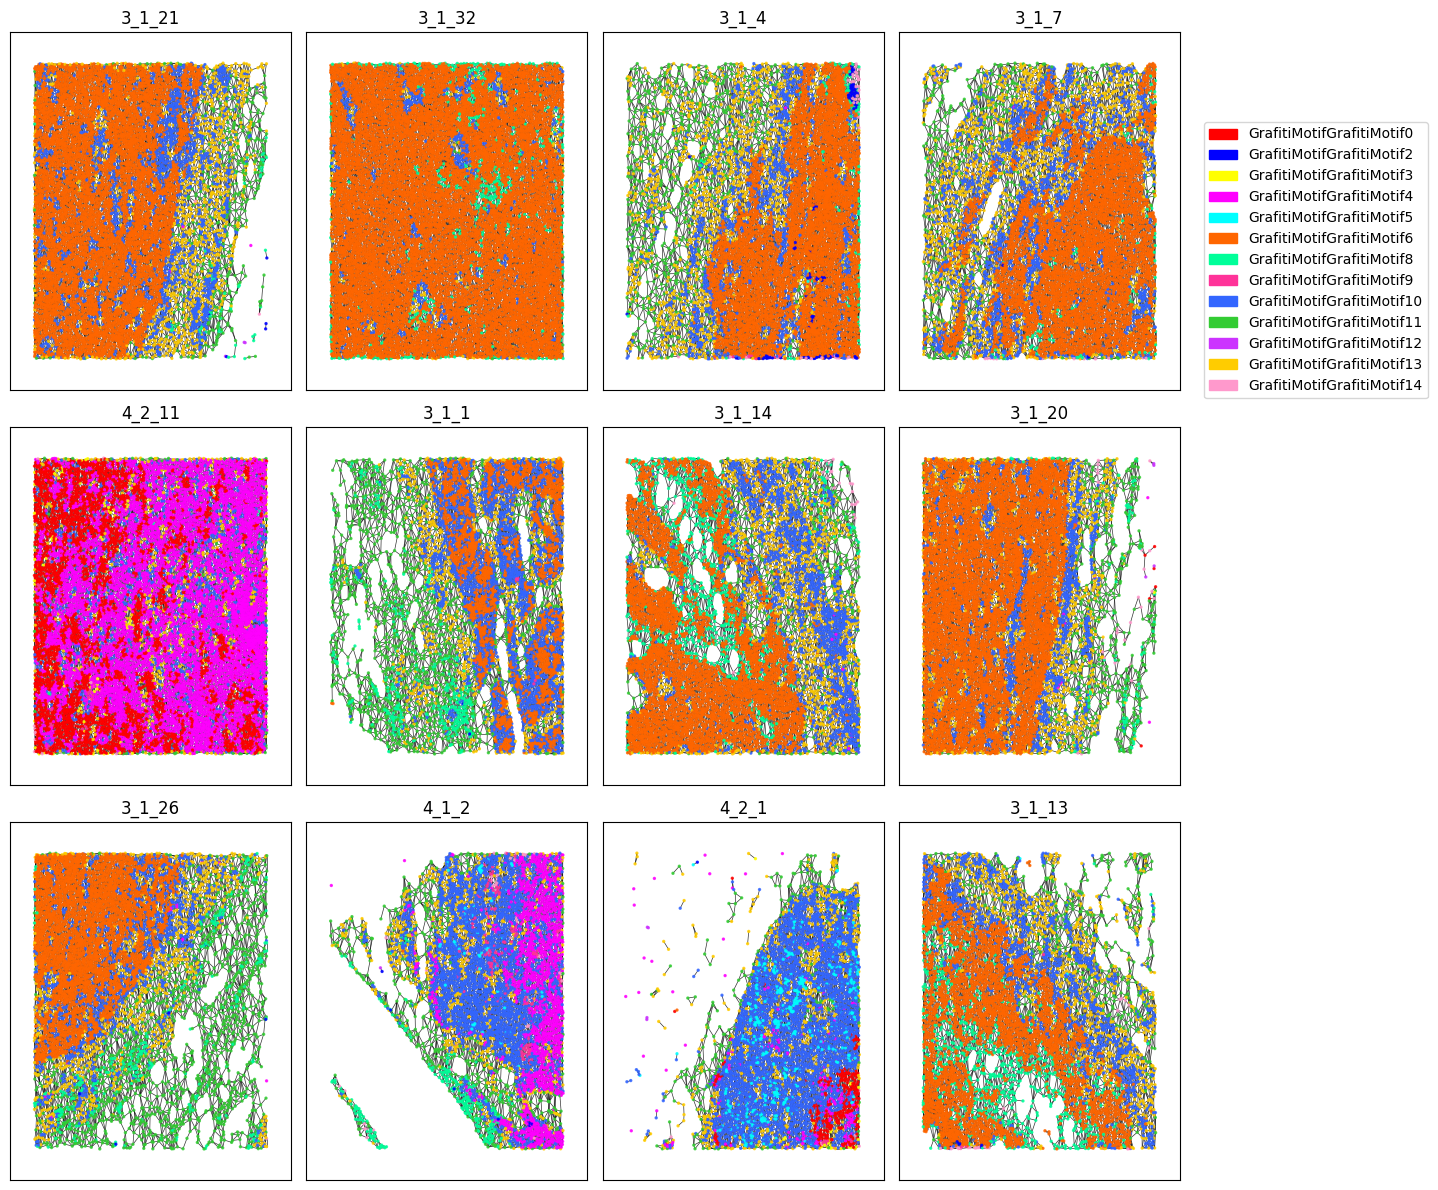

In [8]:
xdata = adata[adata.obs["Driver_mutation"]=="BRAF"]
vids = list(set(xdata.obs["sample_fov"]))[0:12]
print(vids)
gf.pl.plot_fov_graph(adata, fov_id=vids,cluster_key="grafiti_motif", fov_key='sample_fov', s=2, n_cols=4, figsize=(12,12), bbox_to_anchor=(1.2,0.9), save="/Users/ceglian/melanoma_fovs.pdf")

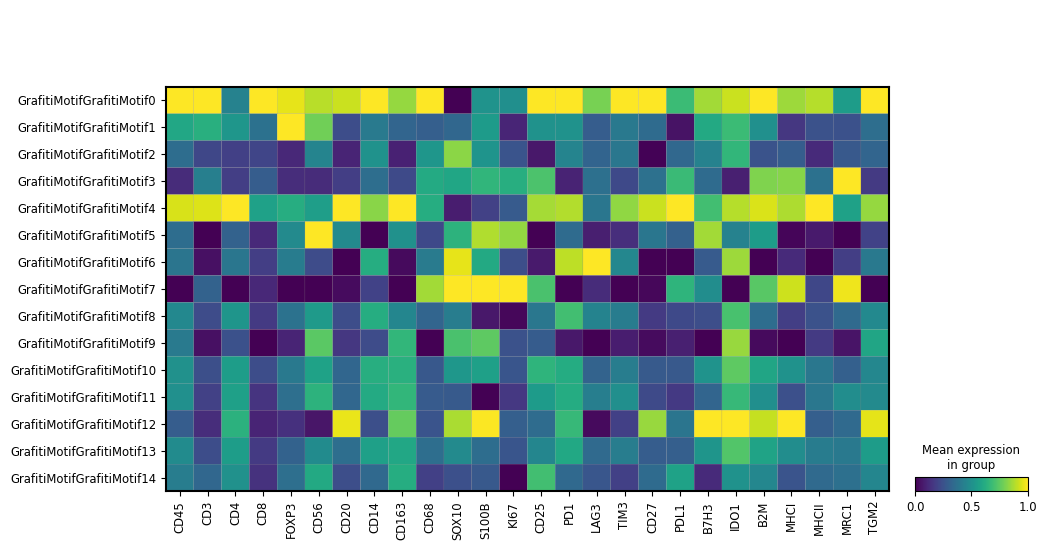

In [10]:
sc.pl.matrixplot(adata,adata.var.index.tolist(),groupby='grafiti_motif',standard_scale="var")